# Data Science and Visualization (RUC F2023)

## Lecture 5: Classification (II)

 # Main Points:
 
## K Nearest Neighborgs (KNN)
## Data Scaling
## Model Evaluation
* ### Cross-Validation
* ### ROC and AUC

## 0. Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## 1. Loading the Data

In [3]:
data = pd.read_csv('..\Data\diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

## 2. Feature Selection

Let's first take a look at all columns' information:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Apparently, the Outcome column contains the class label. So it should be excluded from the features. Let's also assume Age is not that relevant, so we also drop it from the feature columns.

In [8]:
features = data.columns.drop(['Age', 'Outcome'])
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction'],
      dtype='object')

Conventionaly, we use **X** to represent all data under the feature columns, and *y* the class label column in the data.

In [9]:
# Features
X = data[features]

# Target variable
y = data.Outcome 

## 3. A Simple KNN

We just create a simple, default KNN classifier:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# n_neighbors=5 by default
knn = KNeighborsClassifier()

# Training (very light compared to an eager learner)
knn.fit(X_train, y_train)

# Validation/Test
y_pred = knn.predict(X_test)
          
# Get the accuracy from metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {}\r\n".format(accuracy))            

Accuracy: 0.6822916666666666



The plain confusion matrix:

In [11]:
metrics.confusion_matrix(y_test.values, y_pred)

array([[92, 31],
       [30, 39]], dtype=int64)

The visual confusion matrix:

c:\Users\mathi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


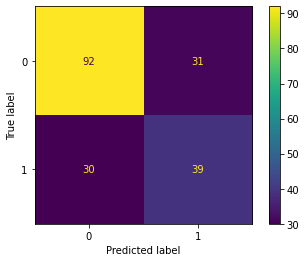

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

## 4. A Series of KNN Classifiers

In this example, we try out many different combinations of the percetage of test data and the value of K for KNN. For each iteration, we split the labelled data, apply the KNN, and measure the performance of the current classifier.

We also record all accuracy results for later visualized comparion between using and not using data scaling.

In [13]:
def knnRunner(X, y):
    # We create a 2-D array to store all accuracy values
    accuracy_data = []
    
    for training_percent in [0.7, 0.8, 0.9]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-training_percent, random_state=1)

        # We crate a 1-D array to store all accuracy values on this split batch
        accuracy_row = []
        
        for k in range(2, 11):
            # Model intializing
            knn = KNeighborsClassifier(n_neighbors=k)

            # Training (very light compared to an eager learner)
            knn.fit(X_train, y_train)

            # Validation/Test
            y_pred = knn.predict(X_test)

            print("KNN with training_percent={}, k={}:\r".format(training_percent, k))
            
            # Get the accuracy from metrics
            accuracy = metrics.accuracy_score(y_test, y_pred)
            print("Accuracy: {}\r\n".format(accuracy))

            accuracy_row.append(accuracy)
            
        accuracy_data.append(accuracy_row)
    
    return accuracy_data

In [14]:
accuracies_no_scaling = knnRunner(X, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.7012987012987013

KNN with training_percent=0.7, k=3:
Accuracy: 0.7272727272727273

KNN with training_percent=0.7, k=4:
Accuracy: 0.7445887445887446

KNN with training_percent=0.7, k=5:
Accuracy: 0.7402597402597403

KNN with training_percent=0.7, k=6:
Accuracy: 0.7316017316017316

KNN with training_percent=0.7, k=7:
Accuracy: 0.7359307359307359

KNN with training_percent=0.7, k=8:
Accuracy: 0.7272727272727273

KNN with training_percent=0.7, k=9:
Accuracy: 0.7359307359307359

KNN with training_percent=0.7, k=10:
Accuracy: 0.7575757575757576

KNN with training_percent=0.8, k=2:
Accuracy: 0.6948051948051948

KNN with training_percent=0.8, k=3:
Accuracy: 0.7142857142857143

KNN with training_percent=0.8, k=4:
Accuracy: 0.7402597402597403

KNN with training_percent=0.8, k=5:
Accuracy: 0.7337662337662337

KNN with training_percent=0.8, k=6:
Accuracy: 0.7207792207792207

KNN with training_percent=0.8, k=7:
Accuracy: 0.7272727272727273

KNN with 

In [61]:
accuracies_no_scaling

[[0.7012987012987013,
  0.7272727272727273,
  0.7445887445887446,
  0.7402597402597403,
  0.7316017316017316,
  0.7359307359307359,
  0.7272727272727273,
  0.7359307359307359,
  0.7575757575757576],
 [0.6948051948051948,
  0.7142857142857143,
  0.7402597402597403,
  0.7337662337662337,
  0.7207792207792207,
  0.7272727272727273,
  0.7532467532467533,
  0.7337662337662337,
  0.7337662337662337],
 [0.7142857142857143,
  0.8181818181818182,
  0.7402597402597403,
  0.7662337662337663,
  0.7532467532467533,
  0.7662337662337663,
  0.7532467532467533,
  0.7662337662337663,
  0.7532467532467533]]

## 5. Data Scaling

Let's take a 'statistical' view of all features:

In [15]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000


### 5.1 StandardScaler

Let's scale the data using zero mean and unit variance scaling, i.e., StandardScaler:

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [17]:
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00


In [18]:
accuracies_standard_scaling = knnRunner(X_scaled, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.7142857142857143

KNN with training_percent=0.7, k=3:
Accuracy: 0.7316017316017316

KNN with training_percent=0.7, k=4:
Accuracy: 0.7445887445887446

KNN with training_percent=0.7, k=5:
Accuracy: 0.7748917748917749

KNN with training_percent=0.7, k=6:
Accuracy: 0.7575757575757576

KNN with training_percent=0.7, k=7:
Accuracy: 0.7922077922077922

KNN with training_percent=0.7, k=8:
Accuracy: 0.7575757575757576

KNN with training_percent=0.7, k=9:
Accuracy: 0.7878787878787878

KNN with training_percent=0.7, k=10:
Accuracy: 0.7792207792207793

KNN with training_percent=0.8, k=2:
Accuracy: 0.7207792207792207

KNN with training_percent=0.8, k=3:
Accuracy: 0.7467532467532467

KNN with training_percent=0.8, k=4:
Accuracy: 0.7662337662337663

KNN with training_percent=0.8, k=5:
Accuracy: 0.7857142857142857

KNN with training_percent=0.8, k=6:
Accuracy: 0.7662337662337663

KNN with training_percent=0.8, k=7:
Accuracy: 0.7857142857142857

KNN with 

In [63]:
accuracies_standard_scaling

[[0.7142857142857143,
  0.7316017316017316,
  0.7445887445887446,
  0.7748917748917749,
  0.7575757575757576,
  0.7922077922077922,
  0.7575757575757576,
  0.7878787878787878,
  0.7792207792207793],
 [0.7207792207792207,
  0.7467532467532467,
  0.7662337662337663,
  0.7857142857142857,
  0.7662337662337663,
  0.7857142857142857,
  0.7792207792207793,
  0.7727272727272727,
  0.7662337662337663],
 [0.7272727272727273,
  0.8051948051948052,
  0.8441558441558441,
  0.7922077922077922,
  0.8051948051948052,
  0.8181818181818182,
  0.8181818181818182,
  0.8181818181818182,
  0.7662337662337663]]

Above, it is clear that KNN classifiers after data scaling achieve higher accuracy than the counterparts without scaling.

### 5.2 MinMaxScaler

Let's try 0-1 scaling (MinMaxScaler) and see the effect.

In [19]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [20]:
X_scaled_mm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
accuracies_minmax_scaling = knnRunner(X_scaled_mm, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.696969696969697

KNN with training_percent=0.7, k=3:
Accuracy: 0.7272727272727273

KNN with training_percent=0.7, k=4:
Accuracy: 0.7229437229437229

KNN with training_percent=0.7, k=5:
Accuracy: 0.7662337662337663

KNN with training_percent=0.7, k=6:
Accuracy: 0.7445887445887446

KNN with training_percent=0.7, k=7:
Accuracy: 0.7748917748917749

KNN with training_percent=0.7, k=8:
Accuracy: 0.7662337662337663

KNN with training_percent=0.7, k=9:
Accuracy: 0.7792207792207793

KNN with training_percent=0.7, k=10:
Accuracy: 0.7489177489177489

KNN with training_percent=0.8, k=2:
Accuracy: 0.7142857142857143

KNN with training_percent=0.8, k=3:
Accuracy: 0.7662337662337663

KNN with training_percent=0.8, k=4:
Accuracy: 0.7727272727272727

KNN with training_percent=0.8, k=5:
Accuracy: 0.7792207792207793

KNN with training_percent=0.8, k=6:
Accuracy: 0.7727272727272727

KNN with training_percent=0.8, k=7:
Accuracy: 0.7987012987012987

KNN with t

In [22]:
accuracies_minmax_scaling

[[0.696969696969697,
  0.7272727272727273,
  0.7229437229437229,
  0.7662337662337663,
  0.7445887445887446,
  0.7748917748917749,
  0.7662337662337663,
  0.7792207792207793,
  0.7489177489177489],
 [0.7142857142857143,
  0.7662337662337663,
  0.7727272727272727,
  0.7792207792207793,
  0.7727272727272727,
  0.7987012987012987,
  0.7727272727272727,
  0.7727272727272727,
  0.7662337662337663],
 [0.7012987012987013,
  0.7402597402597403,
  0.8051948051948052,
  0.7922077922077922,
  0.7792207792207793,
  0.8311688311688312,
  0.8181818181818182,
  0.7922077922077922,
  0.7662337662337663]]

### 5.3 Visualize the scaling effect

We first organize all three 2-D arrays into three DataFrames, respectively.

In [23]:
columns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
index = ['0.7', '0.8', '0.9']

df_no_scaling = pd.DataFrame(accuracies_no_scaling, columns=columns, index=index).transpose()
df_standard_scaling = pd.DataFrame(accuracies_standard_scaling, columns=columns, index=index).transpose()
df_minmax_scaling = pd.DataFrame(accuracies_minmax_scaling, columns=columns, index=index).transpose()

In [24]:
df_no_scaling

,0.7,0.8,0.9
2,0.701299,0.694805,0.714286
3,0.727273,0.714286,0.818182
4,0.744589,0.740260,0.740260
5,0.740260,0.733766,0.766234
6,0.731602,0.720779,0.753247
7,0.735931,0.727273,0.766234
8,0.727273,0.753247,0.753247
9,0.735931,0.733766,0.766234
10,0.757576,0.733766,0.753247


In [25]:
def plotAccuracy(col):
    import matplotlib.pyplot as plt

    plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
    plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
    plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')

    plt.xlabel('K')
    plt.ylabel('KNN accuracy')
    plt.title('Effect of data scaling on KNN for training data ratio={}'.format(col))

    plt.legend()

C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


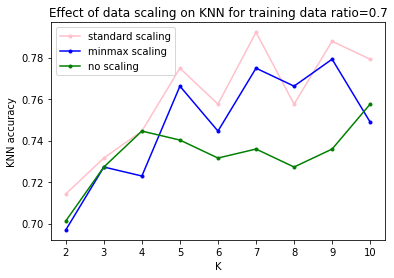

In [26]:
plotAccuracy('0.7')

C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


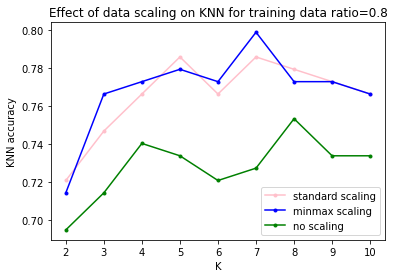

In [27]:
plotAccuracy('0.8')

C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
C:\Users\mathi\AppData\Local\Temp\ipykernel_25388\2969690644.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')


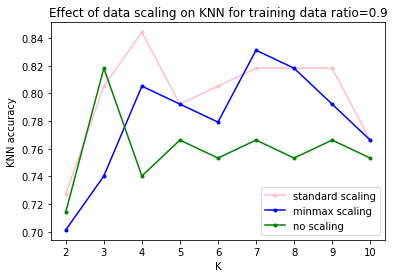

In [28]:
plotAccuracy('0.9')

## 6. Effect of train_test_split(.)

In [12]:
columns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
index = ['0.7', '0.8', '0.9']

df_standard_scaling = pd.DataFrame(accuracies_standard_scaling, columns=columns, index=index).transpose()

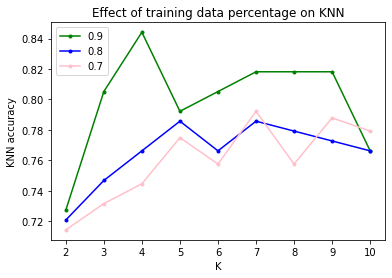

In [15]:
import matplotlib.pyplot as plt

plt.plot(df_standard_scaling.index, df_standard_scaling['0.9'], 'b.-', label = '0.9', color='green')
plt.plot(df_standard_scaling.index, df_standard_scaling['0.8'], 'b.-', label = '0.8', color='blue')
plt.plot(df_standard_scaling.index, df_standard_scaling['0.7'], 'b.-', label = '0.7', color='pink')

plt.xlabel('K')
plt.ylabel('KNN accuracy')
plt.title('Effect of training data percentage on KNN')

plt.legend()

## 7. Cross-Validation

Below we use the diabetes data to demonstrate how to carry out Cross-Validation (or K-Fold validation) and its speicial case LeaveOut. Pay attention to the execution times of each way, especially the long time needed by LeaveOut

**First**, we reobtain the whole training data, and create a KNN classifier.

In [4]:
# Features
X = data[features]

# Target variable
y = data.Outcome 

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)

**Second**, we run a (default) stratified 5-fold cross validation using **cross_val_score(.)**:

In [24]:
%%time
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.70779221 0.66233766 0.70779221 0.75816993 0.67973856]
Average cross-validation score: 0.70
Wall time: 160 ms


**Third**, we run a standard 5-fold cross validation for the same KNN classifier. This need **KFold** class.

In [23]:
%%time
from sklearn.model_selection import KFold

# We need to create a KFold object
kfold = KFold(n_splits=5)
scores = cross_val_score(knn, X, y, cv=kfold)

print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.70779221 0.62337662 0.73376623 0.76470588 0.67320261]
Average cross-validation score: 0.70
Wall time: 182 ms


**Fourth**, we show how to use a standard 3-fold cross-validation to decide K for KNN.

In [25]:
for k in range(3, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    kfold = KFold(n_splits=3)
    scores = cross_val_score(knn, X, y, cv=kfold)

    print("K={}".format(k))
    print("Cross-validation scores: {}".format(scores))
    print("Average cross-validation score: {:.5f}\r\n".format(scores.mean()))

K=3
Cross-validation scores: [0.67578125 0.68359375 0.6875    ]
Average cross-validation score: 0.68229

K=4
Cross-validation scores: [0.69921875 0.71875    0.72265625]
Average cross-validation score: 0.71354

K=5
Cross-validation scores: [0.69140625 0.71484375 0.71875   ]
Average cross-validation score: 0.70833

K=6
Cross-validation scores: [0.7265625  0.71484375 0.71484375]
Average cross-validation score: 0.71875

K=7
Cross-validation scores: [0.7421875  0.703125   0.71484375]
Average cross-validation score: 0.72005

K=8
Cross-validation scores: [0.734375   0.72265625 0.7421875 ]
Average cross-validation score: 0.73307

K=9
Cross-validation scores: [0.7421875  0.7421875  0.73046875]
Average cross-validation score: 0.73828



Which K value would you want to use for your KNN on this diabetes dataset?

**Last**, an example of LeaveOut:

In [26]:
%%time

from sklearn.model_selection import LeaveOneOut

knn = KNeighborsClassifier(n_neighbors=5)
loo = LeaveOneOut()
scores = cross_val_score(knn, X, y, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Cross-validation scores: {}".format(scores))
print("Average croos-validation accuracy: {:.5f}".format(scores.mean()))

Number of cv iterations:  768
Cross-validation scores: [0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.

If you want, you can also try out the following, using LeaveOut to decide K.

In [27]:
for k in range(3, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    loo = LeaveOneOut()
    scores = cross_val_score(knn, X, y, cv=loo)

    print("K={}".format(k))
    #print("Cross-validation scores: {}".format(scores))
    print("Average cross-validation score: {:.5f}\r\n".format(scores.mean()))

K=3
Average cross-validation score: 0.69271

K=4
Average cross-validation score: 0.71224

K=5
Average cross-validation score: 0.71484

K=6
Average cross-validation score: 0.72656

K=7
Average cross-validation score: 0.70443

K=8
Average cross-validation score: 0.71224

K=9
Average cross-validation score: 0.70833



## 8. ROC Curves and AUC

Important functions needed for ROC and AUC:

* **predict_proba(X_test)**: It returns [prob_1, prob_2, ... prob_n] if we have n class labels. All these probabilities add up to 1.
* **roc_curve(y_test, pred_prob)**: It plots the ROC curve for the given groundtruth and prediction probabilities
* **auc(fpr, tpr)**: It calculates the AUC for the given FPR and TPR

We construct a few different KNN classifiers with different K values, and plot the ROC for them in the same figure.

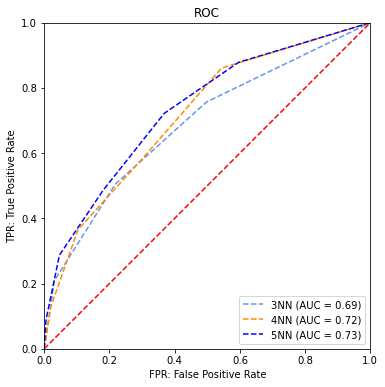

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# plot roc curve's settings
plt.figure(figsize=(6, 6))
plt.title('ROC')
plt.ylabel('TPR: True Positive Rate')
plt.xlabel('FPR: False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
ax = plt.gca()
ax.set_aspect('equal') #, adjustable='box')
plt.plot([0,1], [0,1], 'r--')


colors = ['cornflowerblue', 'darkorange', 'blue', 'seashell', 'gold', 'aqua', 'greenyellow', 'pink']

for k in range(3, 6):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
        
    # Training
    knn.fit(X_train, y_train)

    # Predicting
    y_pred = knn.predict(X_test)
    
    # Evaluate the accuracy
    #accuracy = metrics.accuracy_score(y_test, y_pred)
    #print('accuracy:', accuracy)
    
    # Get the prediction probabilities for Class Label 'Positive' (1)
    pred_prob = knn.predict_proba(X_test)[:,1]
    
    # Compute fpr, tpr
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob, pos_label=1)
    # Compute auc
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC
    plt.plot(fpr, tpr, color=colors[k-3], linestyle='dashed',
             label='{0}NN (AUC = {1:0.2f})'.format(k, roc_auc))

# Plot the legend
plt.legend(loc='lower right')
plt.show()

### A model's predict() and predict_proba()

In the following example, we iterate over all samples in X_test. For each sample, we call both *predict()* and *predict_proba()*. The results show that the class label with the highest probability is returned by predict() as the prediction.

In [8]:
for i in range(0, X_test.shape[0]):
    # We get the current one sample, still in DataFrame format
    one = X_test.iloc[i:i+1, ]
    # We pass the single sample to the model. This way is more often used for model application, 
    # where often one single piece of new data should be classified.
    pred_label = knn.predict(one)
    pred_label_prob = knn.predict_proba(one)
    
    # We compre the outputs from the two functions on the same sample
    print(str(pred_label) + ' vs. ' + str(pred_label_prob))

[0] vs. [[0.8 0.2]]
[0] vs. [[0.6 0.4]]
[0] vs. [[0.8 0.2]]
[1] vs. [[0.4 0.6]]
[0] vs. [[0.6 0.4]]
[0] vs. [[0.6 0.4]]
[0] vs. [[1. 0.]]
[0] vs. [[0.8 0.2]]
[1] vs. [[0.2 0.8]]
[0] vs. [[0.6 0.4]]
[0] vs. [[0.6 0.4]]
[1] vs. [[0. 1.]]
[0] vs. [[0.8 0.2]]
[0] vs. [[1. 0.]]
[0] vs. [[1. 0.]]
[1] vs. [[0.2 0.8]]
[0] vs. [[0.8 0.2]]
[0] vs. [[1. 0.]]
[1] vs. [[0. 1.]]
[1] vs. [[0.4 0.6]]
[1] vs. [[0.2 0.8]]
[0] vs. [[1. 0.]]
[0] vs. [[0.8 0.2]]
[0] vs. [[1. 0.]]
[1] vs. [[0.4 0.6]]
[1] vs. [[0. 1.]]
[0] vs. [[0.8 0.2]]
[0] vs. [[1. 0.]]
[0] vs. [[1. 0.]]
[0] vs. [[1. 0.]]
[1] vs. [[0.2 0.8]]
[0] vs. [[0.6 0.4]]
[1] vs. [[0. 1.]]
[1] vs. [[0. 1.]]
[0] vs. [[0.8 0.2]]
[0] vs. [[0.6 0.4]]
[1] vs. [[0. 1.]]
[0] vs. [[1. 0.]]
[0] vs. [[0.6 0.4]]
[1] vs. [[0.2 0.8]]
[0] vs. [[1. 0.]]
[0] vs. [[0.6 0.4]]
[1] vs. [[0.4 0.6]]
[1] vs. [[0.4 0.6]]
[0] vs. [[0.6 0.4]]
[1] vs. [[0.4 0.6]]
[0] vs. [[0.6 0.4]]
[0] vs. [[0.8 0.2]]
[0] vs. [[0.8 0.2]]
[1] vs. [[0.4 0.6]]
[0] vs. [[1. 0.]]
[1] vs. [[0.4 0.

### References